1、链接MongoDB

In [2]:
import pymongo

client = pymongo.MongoClient(host='localhost',port=27017)
#client = MongoClient('mongodb://localhost:27017')

2、指定名为test的数据库

In [5]:
db = client.test
#db= client['test']

3、指定集合，每个数据库里面存在的集合类似关系型数据库中表,调用名为students的集合

In [6]:
collection = db.students
#collection = db['students']

4、插入数据，#MongoDB每条数据其实都有一个_id来唯一标识，如果没有指明该属，MongoDB会自动产生一个ObjectID类型的_id属性；利用集合的insert方法插入数据,insert()方法在执行后返回_id值

In [8]:
student = {
	'id':'20170101',
	'name':'Jordan',
	'age':20,
	'gender':'male'
}
result = collection.insert(student)
print(result)

/home/kang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  import sys


5dc58d4734116a14aca2c8a8


可以将插入的对象放入到列表中，同时插入多条数据

In [9]:
student1 = {
	'id':'20170102',
	'name':'Kobe',
	'age':19,
	'gender':'male'
}
student2 = {
	'id':'20170103',
	'name':'James',
	'age':19,
	'gender':'male'
}
results = collection.insert([student1,student2])
print(results)

[ObjectId('5dc58d6034116a14aca2c8a9'), ObjectId('5dc58d6034116a14aca2c8aa')]


/home/kang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  del sys.path[0]


python官方不推荐使用insert()方法插入数据，推荐insert_one()和insert_many()方法插入单条数据和多条数据
insert_one()和insert_many()方法分别是InsertOneResult和InsertManyResult对象

In [11]:
student3 = {
	'id':'20170104',
	'name':'Rose',
	'age':18,
	'gender':'male'
}
result = collection.insert_one(student3)
print(result)
print(result.inserted_id)

5dc58dcd34116a14aca2c8ac


使用insert_many()方法

In [12]:
student4 = {
	'id':'20170105',
	'name':'Alice',
	'age':17,
	'gender':'female'
}
student5 = {
	'id':'20170106',
	'name':'Lucy',
	'age':17,
	'gender':'female'
}
results = collection.insert_many([student4,student5])
print(results)
print(results.inserted_ids)

[ObjectId('5dc58df434116a14aca2c8ad'), ObjectId('5dc58df434116a14aca2c8ae')]


5、查询，利用find_one()或者是find方法进行数据查询，find_one()查询得到单个结果

In [13]:
result = collection.find_one({'name':'Kobe'})
print(type(result))
print(result)

<class 'dict'>
{'_id': ObjectId('5dc58d6034116a14aca2c8a9'), 'id': '20170102', 'name': 'Kobe', 'age': 19, 'gender': 'male'}


利用find()返回一个cursor对象相当于生成器对象，查询多条数据

In [15]:
results = collection.find({'age':17})
print(results)
for result in results:
	print(result)

{'_id': ObjectId('5dc58df434116a14aca2c8ad'), 'id': '20170105', 'name': 'Alice', 'age': 17, 'gender': 'female'}
{'_id': ObjectId('5dc58df434116a14aca2c8ae'), 'id': '20170106', 'name': 'Lucy', 'age': 17, 'gender': 'female'}


通过比较运算符查询符合一定范围的内容

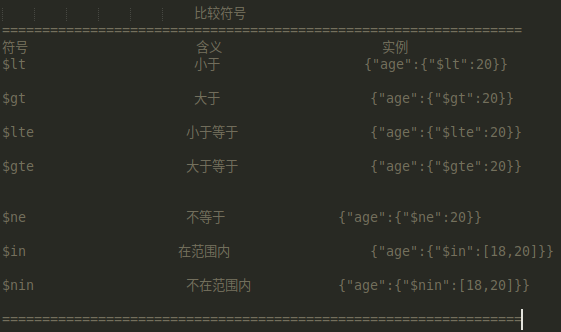

In [16]:
results = collection.find({'age':{'$in':[18,19]}})
for result in results:
	print(result)

{'_id': ObjectId('5dc58d6034116a14aca2c8a9'), 'id': '20170102', 'name': 'Kobe', 'age': 19, 'gender': 'male'}
{'_id': ObjectId('5dc58d6034116a14aca2c8aa'), 'id': '20170103', 'name': 'James', 'age': 19, 'gender': 'male'}
{'_id': ObjectId('5dc58d9634116a14aca2c8ab'), 'id': '20170104', 'name': 'Rose', 'age': 18, 'gender': 'male'}
{'_id': ObjectId('5dc58dcd34116a14aca2c8ac'), 'id': '20170104', 'name': 'Rose', 'age': 18, 'gender': 'male'}


通过正则匹配查询

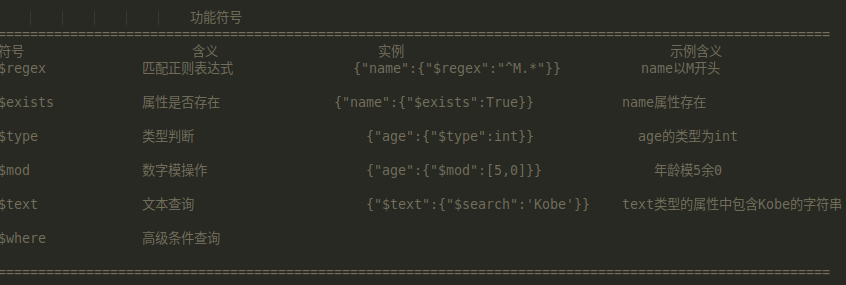

In [19]:
results = collection.find({'name':{'$regex':'^J.*'}})
for result in results:
	print(result)

{'_id': ObjectId('5dc58d4734116a14aca2c8a8'), 'id': '20170101', 'name': 'Jordan', 'age': 20, 'gender': 'male'}
{'_id': ObjectId('5dc58d6034116a14aca2c8aa'), 'id': '20170103', 'name': 'James', 'age': 19, 'gender': 'male'}


6、计数，统计查询结果有多少条数据，使用count方法进行查询

In [26]:
count = results.count()
print(count)
print(type(results))

2
<class 'pymongo.cursor.Cursor'>


/home/kang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


排序,利用sort方法，进行排序，传入升降序标识符(升序 ASCENDING 降序 DESCENDING)

In [27]:
results = collection.find().sort('name',pymongo.ASCENDING)
print([result['name'] for result in results])

['Alice', 'James', 'Jordan', 'Kobe', 'Lucy', 'Rose', 'Rose']


7、偏移,skip()方法偏移几个位置,用limit方法来限定要取出的结果个数

In [28]:
results = collection.find().sort('name,pymongo.ASCENDING').skip(2)
print([result['name'] for result in results])

results = collection.find().sort('name,pymongo.ASCENDING').skip(2).limit(2)
print([result['name'] for result in results])

['James', 'Rose', 'Rose', 'Alice', 'Lucy']
['James', 'Rose']


8、更新,使用update方法，指定更新的条件和更新后的数据

In [29]:
condition = {"name":"James"}
student6 = collection.find_one(condition)
print(student6)
student6['age'] = 22
result = collection.update(condition,student6)
print(result)

{'_id': ObjectId('5dc58d6034116a14aca2c8aa'), 'id': '20170103', 'name': 'James', 'age': 19, 'gender': 'male'}
{'n': 1, 'nModified': 1, 'ok': 1.0, 'updatedExisting': True}


/home/kang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: update is deprecated. Use replace_one, update_one or update_many instead.
  """


In [30]:
student6 = collection.find_one(condition)
print(student6)

{'_id': ObjectId('5dc58d6034116a14aca2c8aa'), 'id': '20170103', 'name': 'James', 'age': 22, 'gender': 'male'}


可以使用$set操作符对数据进行更新，只更新student字典内存在的字段。,官方推荐使用update_one和update_many方法更新数据

In [31]:
condition = {"name":"James"}
student6 = collection.find_one(condition)
print(student6)
student6['age'] = 23
result = collection.update_one(condition,{'$set':student6})
print(result)
print(result.matched_count,result.modified_count)
student6 = collection.find_one(condition)
print(student6)

{'_id': ObjectId('5dc58d6034116a14aca2c8aa'), 'id': '20170103', 'name': 'James', 'age': 22, 'gender': 'male'}
1 1
{'_id': ObjectId('5dc58d6034116a14aca2c8aa'), 'id': '20170103', 'name': 'James', 'age': 23, 'gender': 'male'}


In [35]:
condition = {'age':{'$gt':19}}
students = collection.find(condition)
print([student for student in students])
result = collection.update_many(condition,{'$inc':{'age':1}})
print(result)
print(result.matched_count,result.modified_count)
students = collection.find(condition)
print([student for student in students])

[{'_id': ObjectId('5dc58d4734116a14aca2c8a8'), 'id': '20170101', 'name': 'Jordan', 'age': 20, 'gender': 'male'}, {'_id': ObjectId('5dc58d6034116a14aca2c8aa'), 'id': '20170103', 'name': 'James', 'age': 25, 'gender': 'male'}]
2 2
[{'_id': ObjectId('5dc58d4734116a14aca2c8a8'), 'id': '20170101', 'name': 'Jordan', 'age': 21, 'gender': 'male'}, {'_id': ObjectId('5dc58d6034116a14aca2c8aa'), 'id': '20170103', 'name': 'James', 'age': 26, 'gender': 'male'}]


9、删除,remove方法指定删除条件，官方推荐使用delete_one()和delete_many()方法

In [37]:
students = collection.find()
for student in students:
	print(student)
result = collection.remove({'name':'Kobe'})
print(result)
students = collection.find()
print(students)
result = collection.delete_many({'age':{'$lt':25}})
print(result.deleted_count)
students = collection.find()
for student in students:
	print(student)

{'_id': ObjectId('5dc58d6034116a14aca2c8aa'), 'id': '20170103', 'name': 'James', 'age': 26, 'gender': 'male'}
{'n': 0, 'ok': 1.0}
0
{'_id': ObjectId('5dc58d6034116a14aca2c8aa'), 'id': '20170103', 'name': 'James', 'age': 26, 'gender': 'male'}


/home/kang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  after removing the cwd from sys.path.
